# Example of DOV search methods for CPT measurements (sonderingen)

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DOV-Vlaanderen/pydov/master?filepath=docs%2Fnotebooks%2Fsearch_sonderingen.ipynb)

## Use cases explained below
* Get CPT measurements in a bounding box
* Get CPT measurements with specific properties
* Get CPT measurements in a bounding box based on specific properties
* Select CPT measurements in a municipality and return depth
* Get CPT measurements based on fields not available in the standard output dataframe
* Get CPT measurements data, returning fields not available in the standard output dataframe
* Get CPT measurements in a municipality and where groundwater related data are available
* Listing techniques per CPT measurement

In [1]:
%matplotlib inline
import inspect, sys

In [2]:
import pydov

## Get information about the datatype 'Sondering'

In [3]:
from pydov.search.sondering import SonderingSearch
sondering = SonderingSearch()

A description is provided for the 'Sondering' datatype:

In [4]:
sondering.get_description()

'In DOV worden de resultaten van sonderingen ter beschikking gesteld. Bij het uitvoeren van de sondering wordt een sondeerpunt met conus bij middel van buizen statisch de grond ingedrukt. Continu of met bepaalde diepte-intervallen wordt de weerstand aan de conuspunt, de plaatselijke wrijvingsweerstand en/of de totale indringingsweerstand opgemeten. Eventueel kan aanvullend de waterspanning in de grond rond de conus tijdens de sondering worden opgemeten met een waterspanningsmeter. Het op diepte drukken van de sondeerbuizen gebeurt met een indrukapparaat. De nodige reactie voor het indrukken van de buizen wordt geleverd door een verankering en/of door het gewicht van de sondeerwagen. De totale indrukcapaciteit varieert van 25 kN tot 250 kN, afhankelijk van apparaat en opstellingswijze.'

The different fields that are available for objects of the 'Sondering' datatype can be requested with the get_fields() method:

In [5]:
fields = sondering.get_fields()

# print available fields
for f in fields.values():
    print(f['name'])

id
sondeernummer
pkey_sondering
weerstandsdiagram
meetreeks
x
y
start_sondering_mtaw
gemeente
diepte_sondering_van
diepte_sondering_tot
datum_aanvang
uitvoerder
conus
sondeermethode
apparaat
informele_stratigrafie
formele_stratigrafie
hydrogeologische_stratigrafie
opdrachten
eerste_invoer
geom
datum_gw_meting
diepte_gw_m
lengte
diepte
qc
Qt
fs
u
i
mv_mtaw


You can get more information of a field by requesting it from the fields dictionary:

 * *name*: name of the field
 * *definition*: definition of this field
 * *cost*: currently this is either 1 or 10, depending on the datasource of the field. It is an indication of the expected time it will take to retrieve this field in the output dataframe.
 * *notnull*: whether the field is mandatory or not
 * *type*: datatype of the values of this field
 * *codelist*: optionally, a codelist that describes the possible values of this field

Alternatively, you can list all the fields and their details by inspecting the `get_fields()` output or the search instance itself in a notebook:

In [6]:
sondering

## Example use cases

### Get CPT measurements in a bounding box

Get data for all the CPT measurements that are geographically located within the bounds of the specified box.

The coordinates are in the Belgian Lambert72 (EPSG:31370) coordinate system and are given in the order of lower left x, lower left y, upper right x, upper right y.

In [7]:
from pydov.util.location import Within, Box

df = sondering.search(location=Within(Box(152999, 206930, 153050, 207935)))
df.head()

[000/001] .
[000/001] .


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,...,apparaat,datum_gw_meting,diepte_gw_m,lengte,diepte,qc,Qt,fs,u,i
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-72/555-SXVIII,153008.0,206985.0,NaN,15.8,0.0,36.0,1973-03-21,Rijksinstituut voor Grondmechanica (RIG),...,100 kN,NaN,NaN,0.2,NaN,1.6,2.06,NaN,NaN,NaN
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-72/555-SXVIII,153008.0,206985.0,NaN,15.8,0.0,36.0,1973-03-21,Rijksinstituut voor Grondmechanica (RIG),...,100 kN,NaN,NaN,0.4,NaN,3.6,4.26,NaN,NaN,NaN
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-72/555-SXVIII,153008.0,206985.0,NaN,15.8,0.0,36.0,1973-03-21,Rijksinstituut voor Grondmechanica (RIG),...,100 kN,NaN,NaN,0.6,NaN,2.6,3.46,NaN,NaN,NaN
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-72/555-SXVIII,153008.0,206985.0,NaN,15.8,0.0,36.0,1973-03-21,Rijksinstituut voor Grondmechanica (RIG),...,100 kN,NaN,NaN,0.8,NaN,4.0,5.66,NaN,NaN,NaN
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-72/555-SXVIII,153008.0,206985.0,NaN,15.8,0.0,36.0,1973-03-21,Rijksinstituut voor Grondmechanica (RIG),...,100 kN,NaN,NaN,1.0,NaN,3.0,6.53,NaN,NaN,NaN


The dataframe contains one CPT measurement where multiple measurement points. The available data are flattened to represent unique attributes per row of the dataframe.

Using the *pkey_sondering* field one can request the details of this borehole in a webbrowser:

In [8]:
for pkey_sondering in set(df.pkey_sondering):
    print(pkey_sondering)

https://www.dov.vlaanderen.be/data/sondering/1973-016812


### Get CPT measurements with specific properties

Next to querying CPT based on their geographic location within a bounding box, we can also search for CPT measurements matching a specific set of properties. For this we can build a query using a combination of the 'Sondering' fields and operators provided by the WFS protocol.

A list of possible operators can be found below:

In [9]:
[i for i,j in inspect.getmembers(sys.modules['owslib.fes2'], inspect.isclass) if 'Property' in i]

['PropertyIsBetween',
 'PropertyIsEqualTo',
 'PropertyIsGreaterThan',
 'PropertyIsGreaterThanOrEqualTo',
 'PropertyIsLessThan',
 'PropertyIsLessThanOrEqualTo',
 'PropertyIsLike',
 'PropertyIsNotEqualTo',
 'PropertyIsNull',
 'SortProperty']

In this example we build a query using the *PropertyIsEqualTo* operator to find all CPT measuremetns that are within the community (gemeente) of 'Herstappe':

In [10]:
from owslib.fes2 import PropertyIsEqualTo

query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Elsene')
df = sondering.search(query=query)

df.head()

[000/001] .
[000/029] .............................


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,...,apparaat,datum_gw_meting,diepte_gw_m,lengte,diepte,qc,Qt,fs,u,i
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-75/194-S1,150310.0,169796.0,NaN,56.3,0.0,4.5,1975-05-20,Rijksinstituut voor Grondmechanica (RIG),...,25 kN,NaN,1.97,1.0,NaN,3.3,NaN,NaN,NaN,NaN
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-75/194-S1,150310.0,169796.0,NaN,56.3,0.0,4.5,1975-05-20,Rijksinstituut voor Grondmechanica (RIG),...,25 kN,NaN,1.97,1.1,NaN,2.9,NaN,NaN,NaN,NaN
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-75/194-S1,150310.0,169796.0,NaN,56.3,0.0,4.5,1975-05-20,Rijksinstituut voor Grondmechanica (RIG),...,25 kN,NaN,1.97,1.2,NaN,2.7,NaN,NaN,NaN,NaN
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-75/194-S1,150310.0,169796.0,NaN,56.3,0.0,4.5,1975-05-20,Rijksinstituut voor Grondmechanica (RIG),...,25 kN,NaN,1.97,1.3,NaN,2.4,NaN,NaN,NaN,NaN
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-75/194-S1,150310.0,169796.0,NaN,56.3,0.0,4.5,1975-05-20,Rijksinstituut voor Grondmechanica (RIG),...,25 kN,NaN,1.97,1.4,NaN,3.6,NaN,NaN,NaN,NaN


Once again we can use the *pkey_sondering* as a permanent link to the information of these CPT measurements:

In [11]:
for pkey_sondering in set(df.pkey_sondering):
    print(pkey_sondering)

https://www.dov.vlaanderen.be/data/sondering/1971-022776
https://www.dov.vlaanderen.be/data/sondering/1971-023320
https://www.dov.vlaanderen.be/data/sondering/1975-014064
https://www.dov.vlaanderen.be/data/sondering/1976-013900
https://www.dov.vlaanderen.be/data/sondering/1971-023322
https://www.dov.vlaanderen.be/data/sondering/1975-014063
https://www.dov.vlaanderen.be/data/sondering/1971-023323
https://www.dov.vlaanderen.be/data/sondering/1976-013899
https://www.dov.vlaanderen.be/data/sondering/1971-023091
https://www.dov.vlaanderen.be/data/sondering/1992-000338
https://www.dov.vlaanderen.be/data/sondering/1976-013898
https://www.dov.vlaanderen.be/data/sondering/1992-000337
https://www.dov.vlaanderen.be/data/sondering/1976-030150
https://www.dov.vlaanderen.be/data/sondering/1980-024720
https://www.dov.vlaanderen.be/data/sondering/1971-023321
https://www.dov.vlaanderen.be/data/sondering/1976-030140
https://www.dov.vlaanderen.be/data/sondering/1971-022777
https://www.dov.vlaanderen.be/d

### Get CPT measurements in a bounding box based on specific properties

We can combine a query on attributes with a query on geographic location to get the CPT measurements within a bounding box that have specific properties.

The following example requests the CPT measurements with a depth greater than or equal to 2000 meters within the given bounding box.

(Note that the datatype of the *literal* parameter should be a string, regardless of the datatype of this field in the output dataframe.)

In [12]:
from owslib.fes2 import PropertyIsGreaterThanOrEqualTo

query = PropertyIsGreaterThanOrEqualTo(
            propertyname='diepte_sondering_tot',
            literal='20')

df = sondering.search(
    location=Within(Box(200000, 211000, 205000, 214000)),
    query=query
    )

df.head()

[000/001] .
[000/021] .....................


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,...,apparaat,datum_gw_meting,diepte_gw_m,lengte,diepte,qc,Qt,fs,u,i
0,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-07/054-S3,202348.46,213129.09,NaN,26.27,1.5,20.0,2007-05-10,VO - Afdeling Geotechniek,...,200 kN - TRACK-TRUCK,2007-05-10 10:40:00,NaN,1.55,1.55,0.60,NaN,-1.0,NaN,0.2
1,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-07/054-S3,202348.46,213129.09,NaN,26.27,1.5,20.0,2007-05-10,VO - Afdeling Geotechniek,...,200 kN - TRACK-TRUCK,2007-05-10 10:40:00,NaN,1.60,1.60,0.48,NaN,0.0,NaN,0.2
2,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-07/054-S3,202348.46,213129.09,NaN,26.27,1.5,20.0,2007-05-10,VO - Afdeling Geotechniek,...,200 kN - TRACK-TRUCK,2007-05-10 10:40:00,NaN,1.65,1.65,0.57,NaN,0.0,NaN,0.2
3,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-07/054-S3,202348.46,213129.09,NaN,26.27,1.5,20.0,2007-05-10,VO - Afdeling Geotechniek,...,200 kN - TRACK-TRUCK,2007-05-10 10:40:00,NaN,1.70,1.70,0.86,NaN,0.0,NaN,0.3
4,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-07/054-S3,202348.46,213129.09,NaN,26.27,1.5,20.0,2007-05-10,VO - Afdeling Geotechniek,...,200 kN - TRACK-TRUCK,2007-05-10 10:40:00,NaN,1.75,1.75,0.90,NaN,0.0,NaN,0.3


We can look at one of the CPT measurements in a webbrowser using its *pkey_sondering*:

In [13]:
for pkey_sondering in set(df.pkey_sondering):
    print(pkey_sondering)

https://www.dov.vlaanderen.be/data/sondering/2008-077591
https://www.dov.vlaanderen.be/data/sondering/2008-077581
https://www.dov.vlaanderen.be/data/sondering/2015-054995
https://www.dov.vlaanderen.be/data/sondering/2009-000054
https://www.dov.vlaanderen.be/data/sondering/2007-049200
https://www.dov.vlaanderen.be/data/sondering/2008-077565
https://www.dov.vlaanderen.be/data/sondering/2007-049201
https://www.dov.vlaanderen.be/data/sondering/2010-062407
https://www.dov.vlaanderen.be/data/sondering/2008-077579
https://www.dov.vlaanderen.be/data/sondering/2008-077592
https://www.dov.vlaanderen.be/data/sondering/2008-077566
https://www.dov.vlaanderen.be/data/sondering/2015-055496
https://www.dov.vlaanderen.be/data/sondering/2008-077557
https://www.dov.vlaanderen.be/data/sondering/2008-077545
https://www.dov.vlaanderen.be/data/sondering/2008-077577
https://www.dov.vlaanderen.be/data/sondering/2008-077564
https://www.dov.vlaanderen.be/data/sondering/2009-000053
https://www.dov.vlaanderen.be/d

### Select CPT measurements in a municipality and return depth

We can limit the columns in the output dataframe by specifying the *return_fields* parameter in our search.

In this example we query all the CPT measurements in the city of Ghent and return their depth:

In [14]:
query = PropertyIsEqualTo(propertyname='gemeente',
                          literal='Gent')
df = sondering.search(query=query,
                      return_fields=('diepte_sondering_tot',))
df.head()

[000/001] .


,diepte_sondering_tot
0,2.7
1,1.4
2,7.6
3,11.5
4,18.6


In [15]:
df.describe()

,diepte_sondering_tot
count,3869.000000
mean,18.762853
std,8.522419
min,0.660000
25%,11.800000
50%,19.320000
75%,24.800000
max,52.600000


Text(0, 0.5, 'depth (m)')

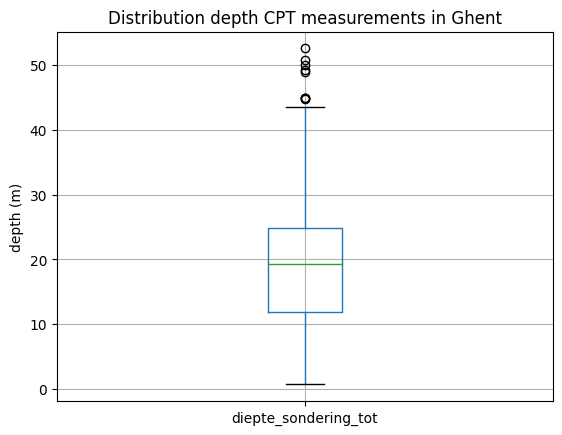

In [16]:
ax = df.boxplot()
ax.set_title('Distribution depth CPT measurements in Ghent');
ax.set_ylabel("depth (m)")

### Get CPT measurements based on fields not available in the standard output dataframe

To keep the output dataframe size acceptable, not all available WFS fields are included in the standard output. However, one can use this information to select CPT measurements as illustrated below.

For example, make a selection of the CPT measurements in municipality the of Antwerp, using a conustype 'U':

In [17]:
from owslib.fes2 import And

query = And([PropertyIsEqualTo(propertyname='gemeente',
                               literal='Antwerpen'),
             PropertyIsEqualTo(propertyname='conus', 
                               literal='U')]
            )
df = sondering.search(query=query,
                      return_fields=('pkey_sondering', 'sondeernummer', 'x', 'y', 'diepte_sondering_tot', 'datum_aanvang'))
df.head()

[000/001] .


,pkey_sondering,sondeernummer,x,y,diepte_sondering_tot,datum_aanvang
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,29.70,1993-03-02
1,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-02/111-S1,150347.3,214036.4,29.95,2002-12-17
2,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-04/123-SKD4-E,146437.7,222317.5,4.45,2004-07-12
3,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-04/123-SKD6-E,146523.9,222379.7,7.40,2004-07-14
4,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-04/123-SKD5-E,146493.4,222298.8,1.65,2004-07-16


### Get CPT data, returning fields not available in the standard output dataframe

As denoted in the previous example, not all available fields are available in the default output frame to keep its size limited. However, you can request any available field by including it in the *return_fields* parameter of the search:

In [18]:
query = And([PropertyIsEqualTo(propertyname='gemeente', literal='Gent'),
             PropertyIsEqualTo(propertyname='conus', literal='U')])

df = sondering.search(query=query,
                      return_fields=('pkey_sondering', 'sondeernummer', 'diepte_sondering_tot',
                                     'conus', 'x', 'y'))

df.head()

[000/001] .


,pkey_sondering,sondeernummer,diepte_sondering_tot,conus,x,y
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SV,33.80,U,110241.6,204692.2
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SI,15.65,U,110062.5,205051.4
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SII,26.50,U,110107.0,204965.3
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SIII,16.50,U,110152.4,204876.1
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SIV,16.70,U,110197.8,204787.0


In [19]:
df

,pkey_sondering,sondeernummer,diepte_sondering_tot,conus,x,y
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SV,33.80,U,110241.60,204692.20
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SI,15.65,U,110062.50,205051.40
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SII,26.50,U,110107.00,204965.30
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SIII,16.50,U,110152.40,204876.10
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SIV,16.70,U,110197.80,204787.00
5,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SIX,27.60,U,110479.50,205240.70
6,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SVI,16.80,U,110288.50,204608.80
7,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SVII,26.70,U,110334.30,204519.80
8,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SX,27.50,U,110685.00,204845.50
9,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-94/020-SXI,25.60,U,109941.50,204346.90


## Resistivity plot

The data for the reporting of resistivity plots with the online application, see for example [this report](https://www.dov.vlaanderen.be/zoeken-ocdov/proxy-sondering/sondering/1993-001275/rapport/identifygrafiek?outputformaat=PDF), is also accessible with the pydov package. Querying the data for this specific _sondering_:

In [20]:
query = PropertyIsEqualTo(propertyname='pkey_sondering',
                          literal='https://www.dov.vlaanderen.be/data/sondering/1993-001275')
df_sond = sondering.search(query=query)

df_sond.head()

[000/001] .
[000/001] .


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,...,apparaat,datum_gw_meting,diepte_gw_m,lengte,diepte,qc,Qt,fs,u,i
0,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,NaN,6.25,0.0,29.7,1993-03-02,MVG - Afdeling Geotechniek,...,200 kN,NaN,NaN,0.6,NaN,11.60,NaN,130.0,69.0,NaN
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,NaN,6.25,0.0,29.7,1993-03-02,MVG - Afdeling Geotechniek,...,200 kN,NaN,NaN,0.7,NaN,6.30,NaN,100.0,29.0,NaN
2,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,NaN,6.25,0.0,29.7,1993-03-02,MVG - Afdeling Geotechniek,...,200 kN,NaN,NaN,0.8,NaN,6.22,NaN,120.0,-4.0,NaN
3,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,NaN,6.25,0.0,29.7,1993-03-02,MVG - Afdeling Geotechniek,...,200 kN,NaN,NaN,0.9,NaN,4.92,NaN,120.0,-48.0,NaN
4,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-93/023-SII-E,152740.0,215493.0,NaN,6.25,0.0,29.7,1993-03-02,MVG - Afdeling Geotechniek,...,200 kN,NaN,NaN,1.0,NaN,4.40,NaN,80.0,-35.0,NaN


We have the depth (`length`) available, together with the measured values for each depth of the variables (in dutch):

* `qc`: Opgemeten waarde van de conusweerstand, uitgedrukt in MPa.
* `Qt`: Opgemeten waarde van de totale weerstand, uitgedrukt in kN.
* `fs`: Opgemeten waarde van de plaatelijke kleefweerstand uitgedrukt in kPa.
* `u`: Opgemeten waarde van de porienwaterspanning, uitgedrukt in kPa.
* `i`: Opgemeten waarde van de inclinatie, uitgedrukt in graden.

To recreate the resistivity plot, we also need the `resistivity number` (wrijvingsgetal `rf`), see [DOV documentation](https://www.dov.vlaanderen.be/page/sonderingen).

\begin{equation}
R_f = \frac{f_s}{q_c}
\end{equation}

**Notice:** $f_s$ is provide in kPa and $q_c$ in MPa.

Adding `rf` to the dataframe:

In [21]:
df_sond["rf"] = df_sond["fs"]/df_sond["qc"]/10  

Recreate the resistivity plot:

In [22]:
import matplotlib.pyplot as plt

In [23]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

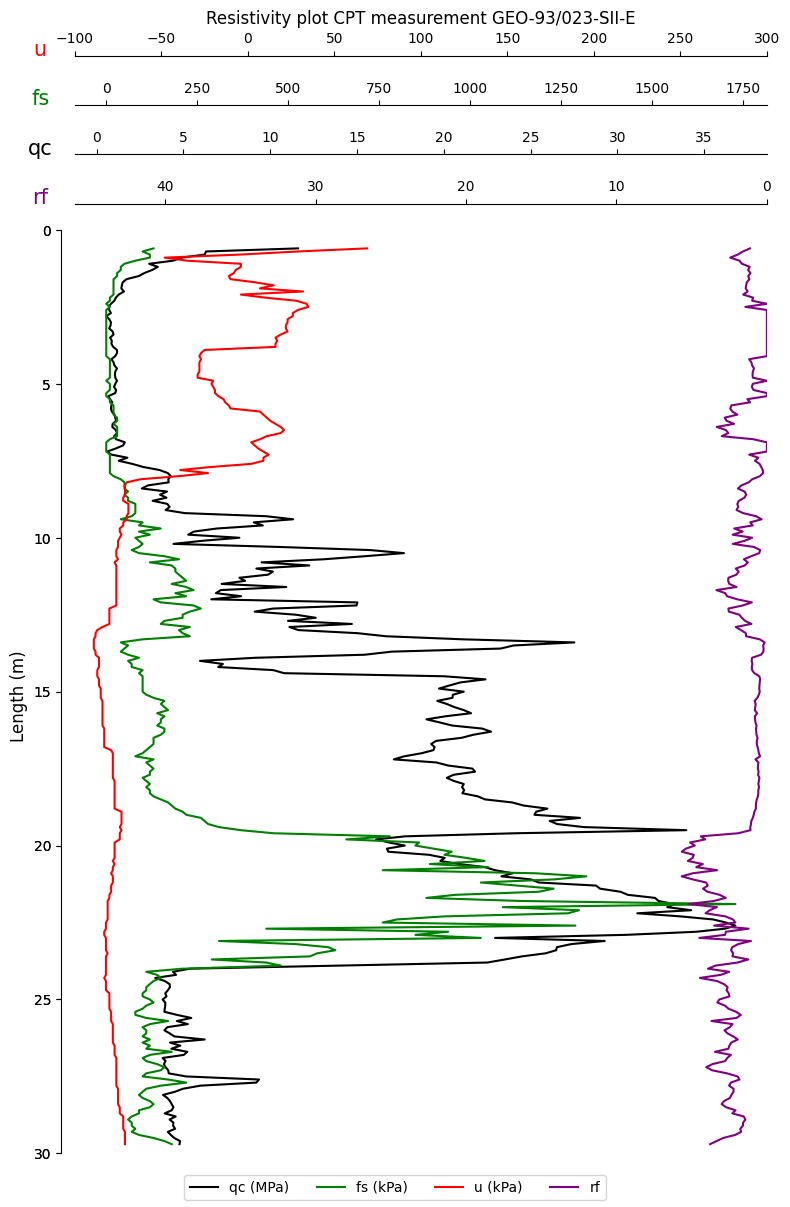

In [24]:
# Determine Lengte or Depth
# If diepte is available, the y-axis will be Diepte
# Else the y-axis will be Lengte
if df_sond['diepte'].isnull().values.any():
    # IsNan
    y_type = "lengte"
    y_axis = "Length (m)"
else:
    y_type = "diepte"
    y_axis = "Depth (m)"


fig, ax0 = plt.subplots(figsize=(8, 12))

# Prepare the individual axis
ax_qc = ax0.twiny()
ax_fs = ax0.twiny()
ax_u = ax0.twiny()
ax_rf = ax0.twiny()

for i, ax in enumerate([ax_qc, ax_fs, ax_u]):
    ax.spines["top"].set_position(("axes", 1+0.05*(i+1)))
    make_patch_spines_invisible(ax)
    ax.spines["top"].set_visible(True)

# Plot the data on the axis
df_sond.plot(x="rf", y=y_type, label="rf", ax=ax_rf, color='purple', legend=False)
df_sond.plot(x="qc", y=y_type, label="qc (MPa)", ax=ax_qc, color='black', legend=False)
df_sond.plot(x="fs", y=y_type, label="fs (kPa)", ax=ax_fs, color='green', legend=False)
df_sond.plot(x="u", y=y_type, label="u (kPa)", ax=ax_u, color='red', 
        legend=False, xlim=(-100, 300)) # ! 300 is hardocded here for the example

# styling and configuration
ax_rf.xaxis.label.set_color('purple')
ax_fs.xaxis.label.set_color('green')
ax_u.xaxis.label.set_color('red')

ax0.axes.set_visible(False)
ax_qc.axes.yaxis.set_visible(False)
ax_fs.axes.yaxis.set_visible(False)
for i, ax in enumerate([ax_rf, ax_qc, ax_fs, ax_u, ax0]):
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.xaxis.label.set_fontsize(15)
    ax.xaxis.set_label_coords(-0.05, 1+0.05*i)
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['left'].set_bounds(0, 30)
ax_rf.set_xlim(0, 46)

ax_u.set_title("Resistivity plot CPT measurement GEO-93/023-SII-E", fontsize=12)

ax0.invert_yaxis()
ax_rf.invert_xaxis()
ax_u.set_ylabel(y_axis, fontsize=12)
fig.legend(loc='lower center', ncol=4)
fig.tight_layout()

## Visualize locations

Using Folium, we can display the results of our search on a map.

In [25]:
# import the necessary modules (not included in the requirements of pydov!)
import folium
from folium.plugins import MarkerCluster
from pyproj import Transformer

In [26]:
# convert the coordinates to lat/lon for folium
def convert_latlon(x1, y1):
    transformer = Transformer.from_crs("epsg:31370", "epsg:4326", always_xy=True)
    x2,y2 = transformer.transform(x1, y1)
    return x2, y2

df['lon'], df['lat'] = zip(*map(convert_latlon, df['x'], df['y'])) 
# convert to list
loclist = df[['lat', 'lon']].values.tolist()

In [27]:
# initialize the Folium map on the centre of the selected locations, play with the zoom until ok
fmap = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=11)
marker_cluster = MarkerCluster().add_to(fmap)
for loc in range(0, len(loclist)):
    folium.Marker(loclist[loc], popup=df['sondeernummer'][loc]).add_to(marker_cluster)
fmap


## Listing techniques per CPT measurement

While performing CPT measurements, different techniques can be used. Since these can have an impact on the results, it can be interesting to download this additional information in order to better comprehend the CPT data.

Different CPT techniques can be applied at various depths, so in pydov this is modelled using a subtype `Techniek`. The result will be that one can then choose to query CPT measurements and either retrieve a dataframe with the measurements themselves, or a dataframe with the techniques applied. The user can subsequently compare or merge the two dataframes at will.

To check the available subtypes for a the `Sondering` type, you can use:

In [28]:
from pydov.types.sondering import Sondering

Sondering.get_subtypes()

{'Meetdata': {'name': 'Meetdata',
  'class': pydov.types.sondering.Meetdata,
  'definition': 'Subtype listing the CPT measurement results. It has the following fields: lengte, diepte, qc, Qt, fs, u, i.'},
 'Techniek': {'name': 'Techniek',
  'class': pydov.types.sondering.Techniek,
  'definition': 'Subtype listing the different techniques used to perform the CPT. It has the following fields: techniek_diepte_van, techniek_diepte, techniek, techniek_andere.'}}

To retrieve the techniques instead of the measurement results, we can instantiate the search class with the `Techniek` subtype:

In [29]:
from pydov.search.sondering import SonderingSearch
from pydov.types.sondering import Techniek

sondering_search = SonderingSearch(
    objecttype=Sondering.with_subtype(Techniek)
)

The extra fields are now available, and should be included in the output of `get_fields()`. E.g. to get more details about the `techniek` field:

In [30]:
sondering_search.get_fields()['techniek']

{'name': 'techniek', 'type': 'string', 'list': False, 'definition': 'De gebruikte techniek.', 'notnull': False, 'query': False, 'cost': 10, 'codelist': <pydov.util.codelists.AbstractCodeList: <pydov.util.codelists.CodeListItem: code: B, label: B, definition: sondeerbuizen door een harde laag geduwd of geboord>, <pydov.util.codelists.CodeListItem: code: D, label: D, definition: dissipatieproef uitgevoerd>, <pydov.util.codelists.CodeListItem: code: E, label: E, definition: sondeerbuizen op en neer bewogen>, <pydov.util.codelists.CodeListItem: code: S, label: S, definition: uitvoering sondering tijdelijk onderbroken>, <pydov.util.codelists.CodeListItem: code: V, label: V, definition: plaatsing van voerbuizen>, <pydov.util.codelists.CodeListItem: code: andere, label: andere, definition: een andere dan de standaard voorziene technieken>>}

And the technique data is returned when querying:

In [31]:
sondering_search.search(max_features=10)

[000/001] .
[000/010] ..........


,pkey_sondering,sondeernummer,x,y,mv_mtaw,start_sondering_mtaw,diepte_sondering_van,diepte_sondering_tot,datum_aanvang,uitvoerder,sondeermethode,apparaat,datum_gw_meting,diepte_gw_m,techniek_diepte_van,techniek_diepte,techniek,techniek_andere
0,https://www.dov.vlaanderen.be/data/sondering/2...,VLA08-3.2-S16,218343.8,211622.9,51.15,51.15,0.0,12.80,2009-02-17,Labo Devlieger - Van Vooren,discontinu mechanisch,200 kN,NaT,NaN,NaN,NaN,NaN,NaN
1,https://www.dov.vlaanderen.be/data/sondering/1...,GEO-92/114-S4,105658.0,188808.0,NaN,12.45,0.0,2.70,1992-10-15,MVG - Afdeling Geotechniek,discontinu mechanisch,25 kN,NaT,NaN,NaN,NaN,NaN,NaN
2,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S23,189313.7,203475.9,NaN,21.40,1.2,15.15,2002-03-06,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-06 14:45:00,1.25,5.50,1.2,V,NaN
3,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S16,189633.5,203331.5,NaN,21.22,1.4,30.00,2002-03-11,MVG - Afdeling Geotechniek,discontinu mechanisch,200 kN - MAN2,2002-03-11 13:50:00,1.22,10.40,9.2,V,NaN
4,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S16,189633.5,203331.5,NaN,21.22,1.4,30.00,2002-03-11,MVG - Afdeling Geotechniek,discontinu mechanisch,200 kN - MAN2,2002-03-11 13:50:00,1.22,13.00,9.2,V,NaN
5,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S10,189907.3,203208.5,NaN,20.92,1.5,15.35,2002-03-13,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-13 14:20:00,1.24,9.50,3.2,V,NaN
6,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S11,189862.4,203231.2,NaN,21.30,1.5,15.20,2002-03-13,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-13 12:50:00,1.55,9.50,4.2,V,NaN
7,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S12,189815.8,203249.5,NaN,21.27,1.6,15.35,2002-03-13,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-13 11:00:00,1.42,9.55,5.8,V,NaN
8,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S13,189770.0,203269.7,NaN,21.33,1.3,15.45,2002-03-12,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-12 14:30:00,1.50,4.50,2.2,V,NaN
9,https://www.dov.vlaanderen.be/data/sondering/2...,GEO-01/169-S14,189724.6,203290.6,NaN,21.26,1.3,15.45,2002-03-12,MVG - Afdeling Geotechniek,continu elektrisch,200 kN - MAN2,2002-03-12 13:00:00,1.30,10.45,4.2,V,NaN
